Mounted at /content/drive
데이터 디렉토리 구조:
data_set/
    train/
        NG/
            CN7_NG/
            BLDC-400-F_NG/
            BLDC-400-B_NG/
            G2_NG/
        OK/
            G2/
            CN7/
            BLDC-400-F/
            BLDC-400-B/
    val/
        NG/
            CN7_NG/
            BLDC-400-F_NG/
            BLDC-400-B_NG/
            G2_NG/
        OK/
            G2/
            CN7/
            BLDC-400-F/
            BLDC-400-B/
    test/
        NG/
            CN7_NG/
            BLDC-400-F_NG/
            BLDC-400-B_NG/
            G2_NG/
        OK/
            G2/
            CN7/
            BLDC-400-F/
            BLDC-400-B/

=== Training efficientnet for parts classification ===

데이터 디렉토리: /content/drive/MyDrive/data_set

train 디렉토리 내용:
['NG', 'OK']

val 디렉토리 내용:
['NG', 'OK']

test 디렉토리 내용:
['NG', 'OK']

학습 데이터 경로: /content/drive/MyDrive/data_set/train/OK
사용 가능한 클래스: ['G2', 'CN7', 'BLDC-400-F', 'BLDC-400-B']
Found 980 images belonging to 4 class

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 373s 11s/step - accuracy: 0.4814 - loss: 1.1854 - val_accuracy: 0.7714 - val_loss: 0.7962
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 267s 9s/step - accuracy: 0.7105 - loss: 0.7811 - val_accuracy: 0.8071 - val_loss: 0.6112
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 256s 8s/step - accuracy: 0.7676 - loss: 0.6132 - val_accuracy: 0.9071 - val_loss: 0.5126
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 261s 8s/step - accuracy: 0.7877 - loss: 0.5631 - val_accuracy: 0.9071 - val_loss: 0.4558
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 269s 9s/step - accuracy: 0.8015 - loss: 0.5134 - val_accuracy: 0.9143 - val_loss: 0.4187
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 263s 8s/step - accuracy: 0.8143 - loss: 0.4887 - val_accuracy: 0.9071 - val_loss: 0.3926
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 264s 9s/step - accuracy: 0.8463 - loss: 0.4469 - val_accuracy: 0.9357 - val_loss: 0.3697
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 260s 8s/step - accuracy: 0.8375 - loss: 0.4479 - val_accuracy: 0.9000 - 

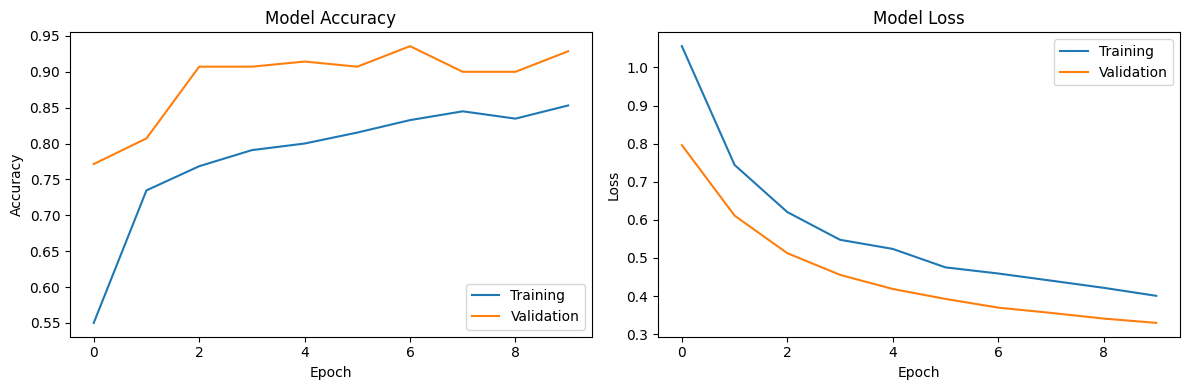

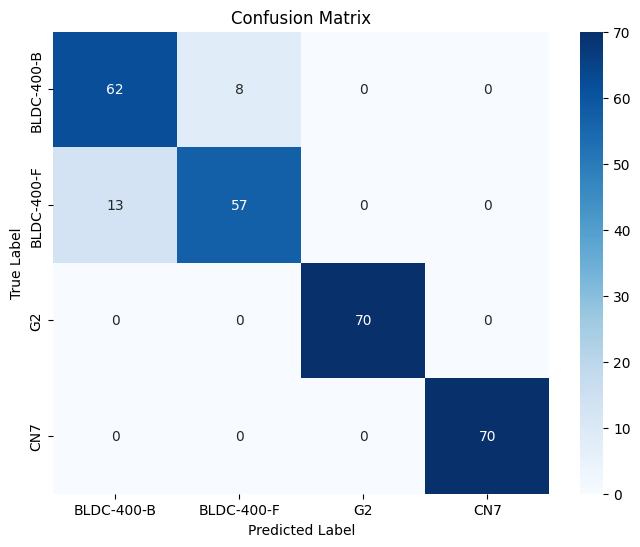


=== Training efficientnet for quality classification ===

데이터 디렉토리: /content/drive/MyDrive/data_set

train 디렉토리 내용:
['NG', 'OK']

val 디렉토리 내용:
['NG', 'OK']

test 디렉토리 내용:
['NG', 'OK']

학습 데이터 경로: /content/drive/MyDrive/data_set/train
사용 가능한 클래스: ['NG', 'OK']
Found 1977 images belonging to 2 classes.

검증 데이터 경로: /content/drive/MyDrive/data_set/val
사용 가능한 클래스: ['NG', 'OK']
Found 281 images belonging to 2 classes.

테스트 데이터 경로: /content/drive/MyDrive/data_set/test
사용 가능한 클래스: ['NG', 'OK']
Found 569 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
19/62 ━━━━━━━━━━━━━━━━━━━━ 5:13 7s/step - accuracy: 0.5624 - loss: 0.6602

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2S, MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 기본 설정
IMAGE_SIZE = 224
BATCH_SIZE = 32
NUM_CLASSES_PARTS = 4  # 부품 분류용
NUM_CLASSES_QUALITY = 2  # OK/NG 분류용

class DiecastingClassifier:
    def __init__(self, model_type, classification_type):
        """
        Args:
            model_type: 'efficientnet' 또는 'mobilenet'
            classification_type: 'parts' 또는 'quality'
        """
        self.model_type = model_type
        self.classification_type = classification_type
        self.num_classes = NUM_CLASSES_PARTS if classification_type == 'parts' else NUM_CLASSES_QUALITY
        self.model = self._create_model()

    def _create_model(self):
        """모델 아키텍처 생성"""
        if self.model_type == 'efficientnet':
            base_model = EfficientNetV2S(
                weights='imagenet',
                include_top=False,
                input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)
            )
        else:  # mobilenet
            base_model = MobileNetV2(
                weights='imagenet',
                include_top=False,
                input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)
            )

        # 전이학습을 위해 기본 모델 동결
        base_model.trainable = False

        # 모델 구성
        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        predictions = Dense(self.num_classes, activation='softmax')(x)

        model = Model(inputs=base_model.input, outputs=predictions)

        # 컴파일
        model.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        return model

    def train(self, train_generator, validation_generator, epochs=10):
        """모델 학습"""
        history = self.model.fit(
            train_generator,
            validation_data=validation_generator,
            epochs=epochs,
            callbacks=[
                tf.keras.callbacks.EarlyStopping(
                    monitor='val_accuracy',
                    patience=3,
                    restore_best_weights=True
                )
            ]
        )
        return history

    def evaluate(self, test_generator):
        """모델 평가"""
        # 예측 수행
        predictions = self.model.predict(test_generator)
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = test_generator.classes

        # 실제 클래스 이름 가져오기
        class_names = list(test_generator.class_indices.keys())
        num_classes = len(class_names)

        # 혼동 행렬 계산
        cm = confusion_matrix(true_classes, predicted_classes)

        # 분류 리포트 생성
        report = classification_report(
            true_classes,
            predicted_classes,
            labels=range(num_classes),
            target_names=class_names,
            output_dict=True
        )

        # 평가 지표 계산
        test_loss, test_accuracy = self.model.evaluate(test_generator)

        print(f"\n실제 클래스: {class_names}")
        print(f"클래스 수: {num_classes}")
        print(f"\n테스트 정확도: {test_accuracy:.4f}")
        print(f"테스트 손실: {test_loss:.4f}")

        return {
            'confusion_matrix': cm,
            'classification_report': report,
            'test_loss': test_loss,
            'test_accuracy': test_accuracy,
            'class_names': class_names
        }

    def plot_training_history(self, history):
        """학습 히스토리 시각화"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

        # 정확도 그래프
        ax1.plot(history.history['accuracy'], label='Training')
        ax1.plot(history.history['val_accuracy'], label='Validation')
        ax1.set_title('Model Accuracy')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Accuracy')
        ax1.legend()

        # 손실 그래프
        ax2.plot(history.history['loss'], label='Training')
        ax2.plot(history.history['val_loss'], label='Validation')
        ax2.set_title('Model Loss')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.legend()

        plt.tight_layout()
        plt.show()

    def plot_confusion_matrix(self, cm, class_names):
        """혼동 행렬 시각화"""
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=class_names,
                   yticklabels=class_names)
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

def create_data_generators(data_dir, classification_type):
    """데이터 제너레이터 생성"""
    datagen = ImageDataGenerator(
        rescale=1./255
    )

    # 디렉토리 구조에 따른 설정
    if classification_type == 'parts':
        class_mode = 'categorical'
        # OK 폴더 내의 클래스만 사용
        subdirs = ['OK']
        classes = ['BLDC-400-B', 'BLDC-400-F', 'G2', 'CN7']
    else:  # quality
        class_mode = 'categorical'
        subdirs = ['OK', 'NG']
        classes = ['OK', 'NG']  # 품질 검사를 위한 클래스 명시

    # 데이터 경로 출력
    print(f"\n데이터 디렉토리: {data_dir}")
    for subdir in ['train', 'val', 'test']:
        print(f"\n{subdir} 디렉토리 내용:")
        full_path = os.path.join(data_dir, subdir)
        if os.path.exists(full_path):
            print(os.listdir(full_path))
        else:
            print(f"경로가 존재하지 않음: {full_path}")

    # 학습 데이터 생성
    if classification_type == 'parts':
        train_path = os.path.join(data_dir, 'train', 'OK')
    else:
        train_path = os.path.join(data_dir, 'train')

    print(f"\n학습 데이터 경로: {train_path}")
    if os.path.exists(train_path):
        print(f"사용 가능한 클래스: {os.listdir(train_path)}")

    train_generator = datagen.flow_from_directory(
        train_path,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode=class_mode,
        classes=classes,
        shuffle=True
    )

    # 검증 데이터 생성
    if classification_type == 'parts':
        val_path = os.path.join(data_dir, 'val', 'OK')
    else:
        val_path = os.path.join(data_dir, 'val')

    print(f"\n검증 데이터 경로: {val_path}")
    if os.path.exists(val_path):
        print(f"사용 가능한 클래스: {os.listdir(val_path)}")

    val_generator = datagen.flow_from_directory(
        val_path,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode=class_mode,
        classes=classes,
        shuffle=False
    )

    # 테스트 데이터 생성
    if classification_type == 'parts':
        test_path = os.path.join(data_dir, 'test', 'OK')
    else:
        test_path = os.path.join(data_dir, 'test')

    print(f"\n테스트 데이터 경로: {test_path}")
    if os.path.exists(test_path):
        print(f"사용 가능한 클래스: {os.listdir(test_path)}")

    test_generator = datagen.flow_from_directory(
        test_path,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode=class_mode,
        classes=classes,
        shuffle=False
    )

    return train_generator, val_generator, test_generator

def main():
    # Google Drive 마운트
    from google.colab import drive
    drive.mount('/content/drive')

    # 데이터 경로 설정
    data_dir = '/content/drive/MyDrive/data_set'

    # 경로 존재 확인
    if not os.path.exists(data_dir):
        raise ValueError(f"데이터 경로가 존재하지 않습니다: {data_dir}")

    print(f"데이터 디렉토리 구조:")
    for root, dirs, files in os.walk(data_dir):
        level = root.replace(data_dir, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(root)}/")
        subindent = ' ' * 4 * (level + 1)

    # 모델 설정
    model_configs = [
        {'model_type': 'efficientnet', 'classification_type': 'parts'},
        {'model_type': 'efficientnet', 'classification_type': 'quality'},
        {'model_type': 'mobilenet', 'classification_type': 'parts'},
        {'model_type': 'mobilenet', 'classification_type': 'quality'}
    ]

    for config in model_configs:
        print(f"\n=== Training {config['model_type']} for {config['classification_type']} classification ===")

        # 데이터 제너레이터 생성
        train_gen, val_gen, test_gen = create_data_generators(
            data_dir,
            config['classification_type']
        )

        # 모델 생성 및 학습
        classifier = DiecastingClassifier(
            config['model_type'],
            config['classification_type']
        )

        history = classifier.train(train_gen, val_gen)

        # 결과 평가 및 시각화
        results = classifier.evaluate(test_gen)

        print(f"\nTest Accuracy: {results['test_accuracy']:.4f}")
        print(f"Test Loss: {results['test_loss']:.4f}")
        print("\nClassification Report:")
        for class_name, metrics in results['classification_report'].items():
            if isinstance(metrics, dict):
                print(f"\n{class_name}:")
                print(f"Precision: {metrics['precision']:.4f}")
                print(f"Recall: {metrics['recall']:.4f}")
                print(f"F1-score: {metrics['f1-score']:.4f}")

        # 학습 히스토리 및 혼동 행렬 시각화
        classifier.plot_training_history(history)
        classifier.plot_confusion_matrix(
            results['confusion_matrix'],
            list(test_gen.class_indices.keys())
        )

if __name__ == "__main__":
    main()